# Project: Write A Data Science Blog Post

## 120 years of Olympic history: Athletes and Results

The CRISP-DM method will be applied here to keep track of the analysis process

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

%matplotlib inline

# Data Understanding

This project will use 120 years of Olympic history: Athletes and Results Dataset from Kaggle. Below are the steps to look at and understand the dataset.

In [2]:
# Load dataset
olympics = pd.read_csv('athlete_events.csv', sep=',') 

In [3]:
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
olympics.shape

(271116, 15)

In [5]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
olympics.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [7]:
olympics.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

The 120 years of Olympic history: Athletes and Results Dataset contains 271116 rows per 15 columns that describes every athlete from Sex, Age, Height and Weight, as well as certain characteristics that comes from the performance of every athetle such as Medal. Furthermore, represents cities, season, sport, year and so on in interaction of the attendence of the athlete to the respective Game/Season.

In [8]:
# Dataframe profiling
pandas_profiling.ProfileReport(olympics)

Number of variables,15
Number of observations,271116
Total Missing (%),8.9%
Total size in memory,31.0 MiB
Average record size in memory,120.0 B
Numeric,5
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,0


# Data Preparation

#### Remove Duplicates

In [9]:
olympics.duplicated().sum()

1385

In [10]:
# dropping ALL duplicate values 
olympics.drop_duplicates(keep = False, inplace = True)

In [11]:
olympics.duplicated().sum()

0

#### Drop Unneccesary Tables

In [12]:
olympics = olympics.drop(['Name','Team', 'Games'], axis=1)

#### Missing Values in the data

In [13]:
#How much missing data is present in each column?
nan_list = olympics.isnull().sum()[olympics.isnull().sum() != 0]

In [14]:
data_dict = {'count': nan_list.values, 'pct':np.round(nan_list.values *100/271116,2)}

In [15]:
olympics_nan = pd.DataFrame(data=data_dict, index=nan_list.index)
olympics_nan.sort_values(by='count', ascending=False, inplace=True)
olympics_nan

,count,pct
Medal,229358,84.60
Weight,60923,22.47
Height,58215,21.47
Age,9223,3.40


In [16]:
missing_values = olympics.isnull().sum()
print (missing_values)

ID             0
Sex            0
Age         9223
Height     58215
Weight     60923
NOC            0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229358
dtype: int64


#### Fill NaNs

In [17]:
# Medal column from NaN to Not Available
olympics['Medal'] = olympics['Medal'].fillna('Not Available')

In [18]:
# Age, Height and Weight columns fill NaN with median
median = olympics.median()
olympics.fillna(median, inplace=True)

In [19]:
olympics.isnull().sum()

ID        0
Sex       0
Age       0
Height    0
Weight    0
NOC       0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [20]:
olympic_games = olympics.copy()

####  Re-Encode Features

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
olympic_games.dtypes

ID          int64
Sex        object
Age       float64
Height    float64
Weight    float64
NOC        object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [23]:
olympic_games['Sex_enc'] = (LabelEncoder().fit_transform(olympic_games['Sex']))+1
olympic_games[['Sex','Sex_enc']].head() 

,Sex,Sex_enc
0,M,2
1,M,2
2,M,2
3,M,2
4,F,1


In [24]:
olympic_games['NOC_enc'] = (LabelEncoder().fit_transform(olympic_games['NOC']))+1
olympic_games[['NOC','NOC_enc']].head() 

,NOC,NOC_enc
0,CHN,42
1,CHN,42
2,DEN,56
3,DEN,56
4,NED,146


In [25]:
olympic_games['Season_enc'] = (LabelEncoder().fit_transform(olympic_games['Season']))+1
olympic_games[['Season','Season_enc']].head() 

,Season,Season_enc
0,Summer,1
1,Summer,1
2,Summer,1
3,Summer,1
4,Winter,2


In [26]:
olympic_games['City_enc'] = (LabelEncoder().fit_transform(olympic_games['City']))+1
olympic_games[['City','City_enc']].head() 

,City,City_enc
0,Barcelona,6
1,London,18
2,Antwerpen,3
3,Paris,27
4,Calgary,9


In [27]:
olympic_games['Sport_enc'] = (LabelEncoder().fit_transform(olympic_games['Sport']))+1
olympic_games[['Sport','Sport_enc']].head() 

,Sport,Sport_enc
0,Basketball,9
1,Judo,33
2,Football,25
3,Tug-Of-War,62
4,Speed Skating,54


In [28]:
olympic_games['Event_enc'] = (LabelEncoder().fit_transform(olympic_games['Event']))+1
olympic_games[['Event','Event_enc']].head() 

,Event,Event_enc
0,Basketball Men's Basketball,160
1,Judo Men's Extra-Lightweight,398
2,Football Men's Football,349
3,Tug-Of-War Men's Tug-Of-War,710
4,Speed Skating Women's 500 metres,623


In [29]:
olympic_games['Medal_enc'] = (LabelEncoder().fit_transform(olympic_games['Medal']))+1
olympic_games[['Medal','Medal_enc']].head() 

,Medal,Medal_enc
0,Not Available,3
1,Not Available,3
2,Not Available,3
3,Gold,2
4,Not Available,3


In [30]:
olympic_games = olympic_games.drop(['Sex','NOC','Season','City','Sport','Event','Medal'], axis=1)

In [31]:
olympic_games.head()

,ID,Age,Height,Weight,Year,Sex_enc,NOC_enc,Season_enc,City_enc,Sport_enc,Event_enc,Medal_enc
0,1,24.0,180.0,80.0,1992,2,42,1,6,9,160,3
1,2,23.0,170.0,60.0,2012,2,42,1,18,33,398,3
2,3,24.0,175.0,70.0,1920,2,56,1,3,25,349,3
3,4,34.0,175.0,70.0,1900,2,56,1,27,62,710,2
4,5,21.0,185.0,82.0,1988,1,146,2,9,54,623,3


In [32]:
olympic_games.shape

(269119, 12)

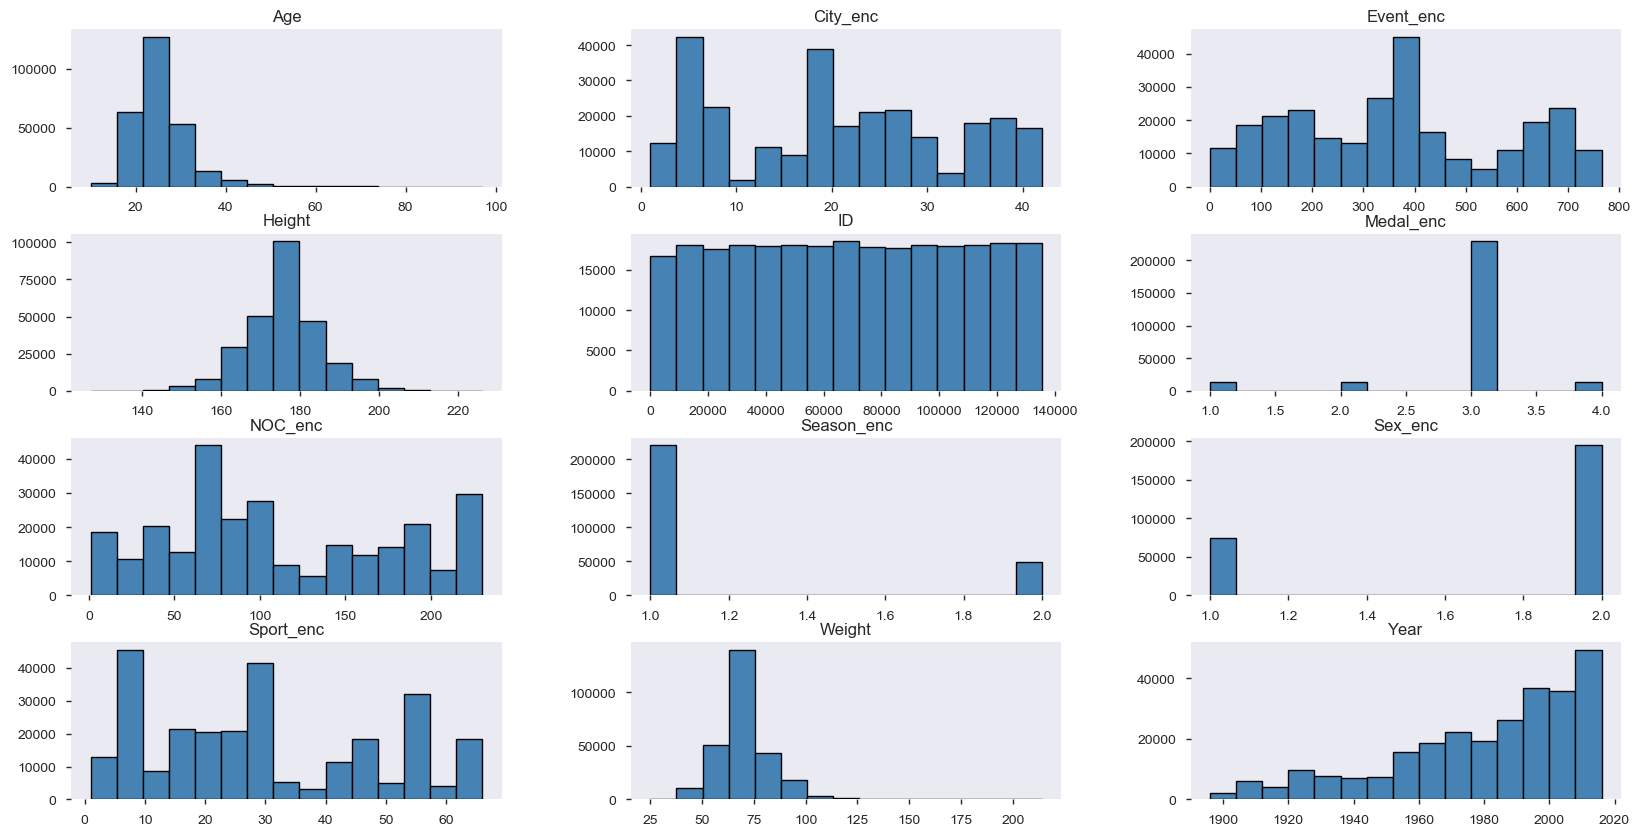

In [33]:
# Review Distribution skew
olympic_games.hist(figsize=(20, 10), bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
                   xlabelsize=10, ylabelsize=10, grid=False); 

#### Imputing and Scaling features

In [34]:
features = olympic_games.copy()

In [35]:
# Apply feature scaling 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

C:\Users\ominguet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ominguet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [36]:
imputer = SimpleImputer()
imputed_features = imputer.fit_transform(standardized_features)

#### Correlation

In [37]:
#finding correlation between the variables
corr_matrix = olympic_games.corr()
corr_matrix.style.background_gradient()
corr_matrix

,ID,Age,Height,Weight,Year,Sex_enc,NOC_enc,Season_enc,City_enc,Sport_enc,Event_enc,Medal_enc
ID,1.000000,-0.002357,-0.009610,-0.007732,0.011300,-0.026693,0.005609,0.013534,-0.001942,0.012298,0.013552,-0.006710
Age,-0.002357,1.000000,0.111593,0.168327,-0.065310,0.173613,0.004910,-0.026154,-0.003421,-0.048174,-0.063348,-0.013777
Height,-0.009610,0.111593,1.000000,0.786711,0.039915,0.448165,0.005908,-0.030502,-0.025760,0.032721,0.000439,-0.034372
Weight,-0.007732,0.168327,0.786711,1.000000,0.027108,0.465194,0.010946,0.002804,-0.012228,0.077009,0.042935,-0.034744
Year,0.011300,-0.065310,0.039915,0.027108,1.000000,-0.288530,-0.044841,0.143673,0.047611,0.031936,0.039875,0.023748
Sex_enc,-0.026693,0.173613,0.448165,0.465194,-0.288530,1.000000,0.008984,-0.036026,-0.006639,-0.000116,-0.040618,0.002131
NOC_enc,0.005609,0.004910,0.005908,0.010946,-0.044841,0.008984,1.000000,0.040324,0.037219,-0.009924,-0.009432,-0.031554
Season_enc,0.013534,-0.026154,-0.030502,0.002804,0.143673,-0.036026,0.040324,1.000000,0.181389,-0.123135,-0.148796,0.019103
City_enc,-0.001942,-0.003421,-0.025760,-0.012228,0.047611,-0.006639,0.037219,0.181389,1.000000,-0.006805,-0.009211,0.004042
Sport_enc,0.012298,-0.048174,0.032721,0.077009,0.031936,-0.000116,-0.009924,-0.123135,-0.006805,1.000000,0.988191,-0.026785


In [38]:
#how each attributes correlates with response value
corr_matrix['Sex_enc'].sort_values(ascending=False)

Sex_enc       1.000000
Weight        0.465194
Height        0.448165
Age           0.173613
NOC_enc       0.008984
Medal_enc     0.002131
Sport_enc    -0.000116
City_enc     -0.006639
ID           -0.026693
Season_enc   -0.036026
Event_enc    -0.040618
Year         -0.288530
Name: Sex_enc, dtype: float64

In the 120 years of Olympic history: Athletes and Results Dataset only have 1385 duplicate values, as a consequence were dropped, as well as the columns **Name** as not intent of analyzing how many Medal could have won an Athlete during same/different games was intented, **Team** and **Games** because of the high cardinality with **NOC** and **Year** / **Season** respectively.  Subsequently, only **Medal, Weight, Height, Age** column contain missing values, being **Medal** the column with the highest number of missing values reaching 84%, makes the information in that column invaluable, but it was kept to perform analysis with the rest of the data points that we have available there, that don't represent a big part of the population but can tell us something.

Next, in order to deal with the missing values **Age** , **Weight** and **Height** with the median and **Medal** were filled up with Not Available. Moreover, a copy of the original dataset was made to use it for re-encoding the categorical features, to proceed to scale the dataset.

Finally, a correlation between the variables was done to define how certain features correlates to the response value, in this case the **Sex** variable, that will be use purposefully to select the fetures that will be used for an **Random Forest Classifier** 

# Business understanding
Questions related to business or real-world applications

In [39]:
olympics.head()

,ID,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal
0,1,M,24.0,180.0,80.0,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Not Available
1,2,M,23.0,170.0,60.0,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Not Available
2,3,M,24.0,175.0,70.0,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,Not Available
3,4,M,34.0,175.0,70.0,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,F,21.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Not Available


#### Question 1

**1.** How many women and men have been participating in the Olympic Games and their Age Distribution? How is the participation per edition of the Games?

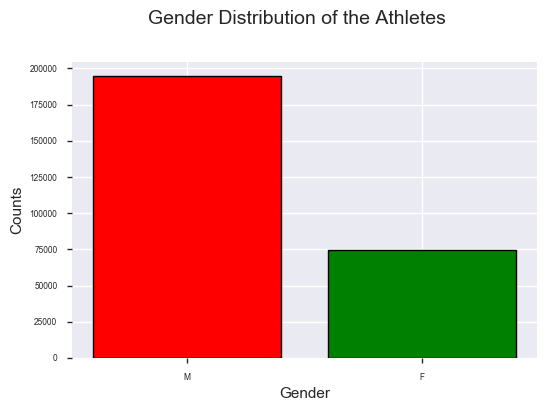

In [40]:
# Bar Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Gender Distribution of the Athletes", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
my_colors = 'rgb'  #red, green, blue.

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Gender")
ax.set_ylabel("Counts") 
gender = olympics['Sex'].value_counts()
gender = (list(gender.index), list(gender.values))
ax.tick_params(axis='both', which='major', labelsize=6)
bar = ax.bar(gender[0], gender[1], edgecolor='black', color=my_colors, linewidth=1)

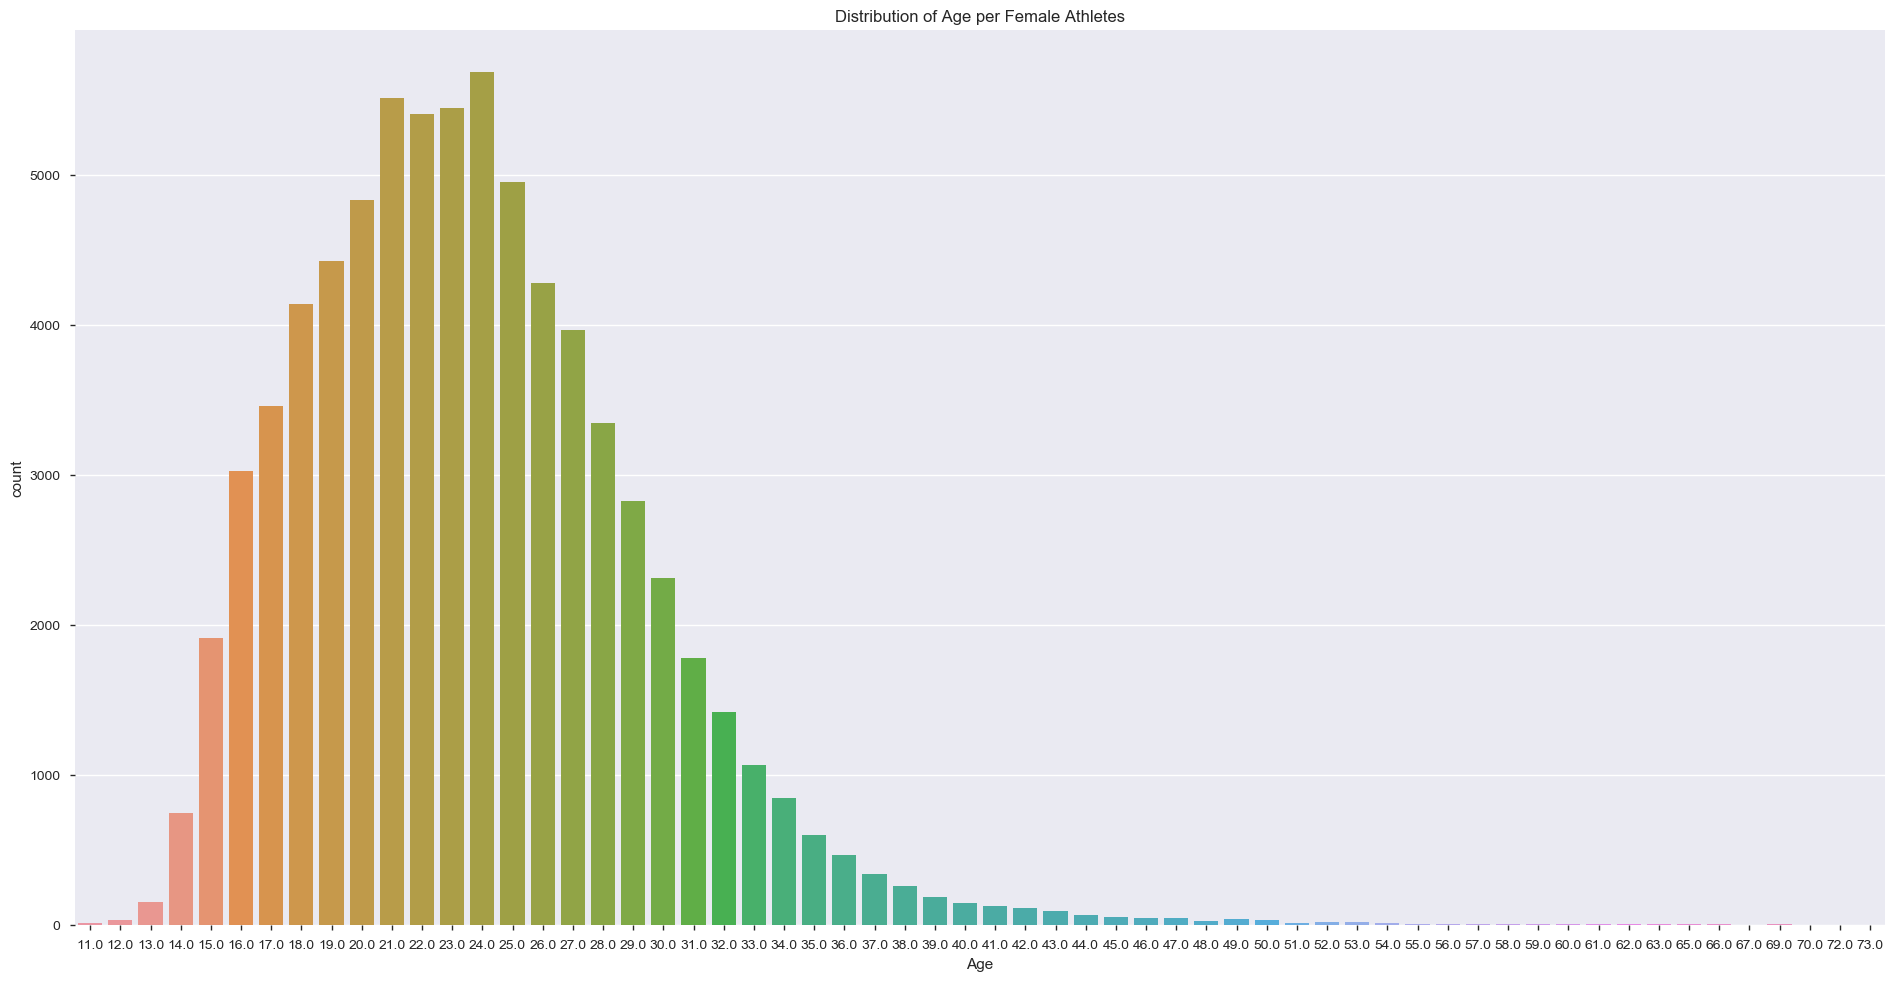

In [41]:
gender_f = olympics[(olympics.Sex == 'F')]
plt.figure(figsize=(20,10))
sns.countplot(gender_f['Age'])
plt.subplots_adjust(left=0.065, right=0.97, top=0.96, bottom=0.065)
plt.title('Distribution of Age per Female Athletes');

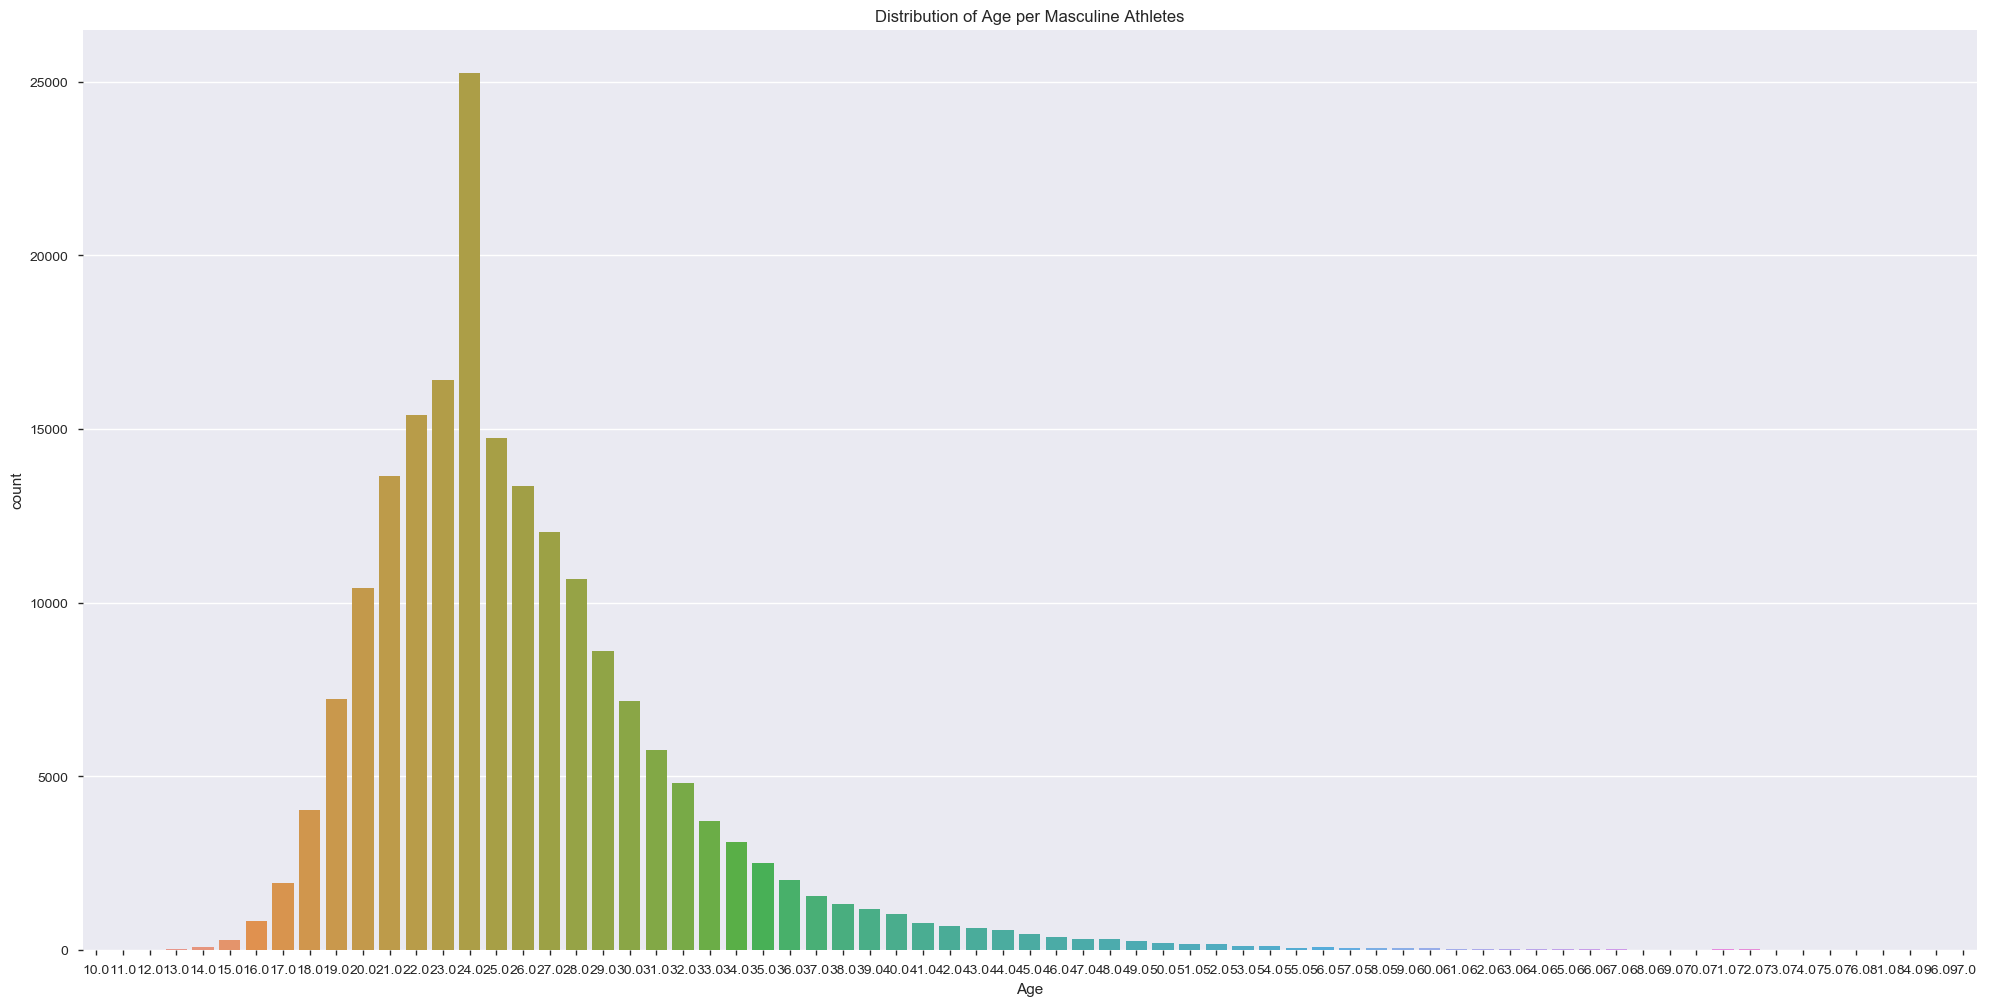

In [42]:
gender_m = olympics[(olympics.Sex == 'M')]
plt.figure(figsize=(20,10))
sns.countplot(gender_m['Age'])
plt.tight_layout()
plt.title('Distribution of Age per Masculine Athletes');

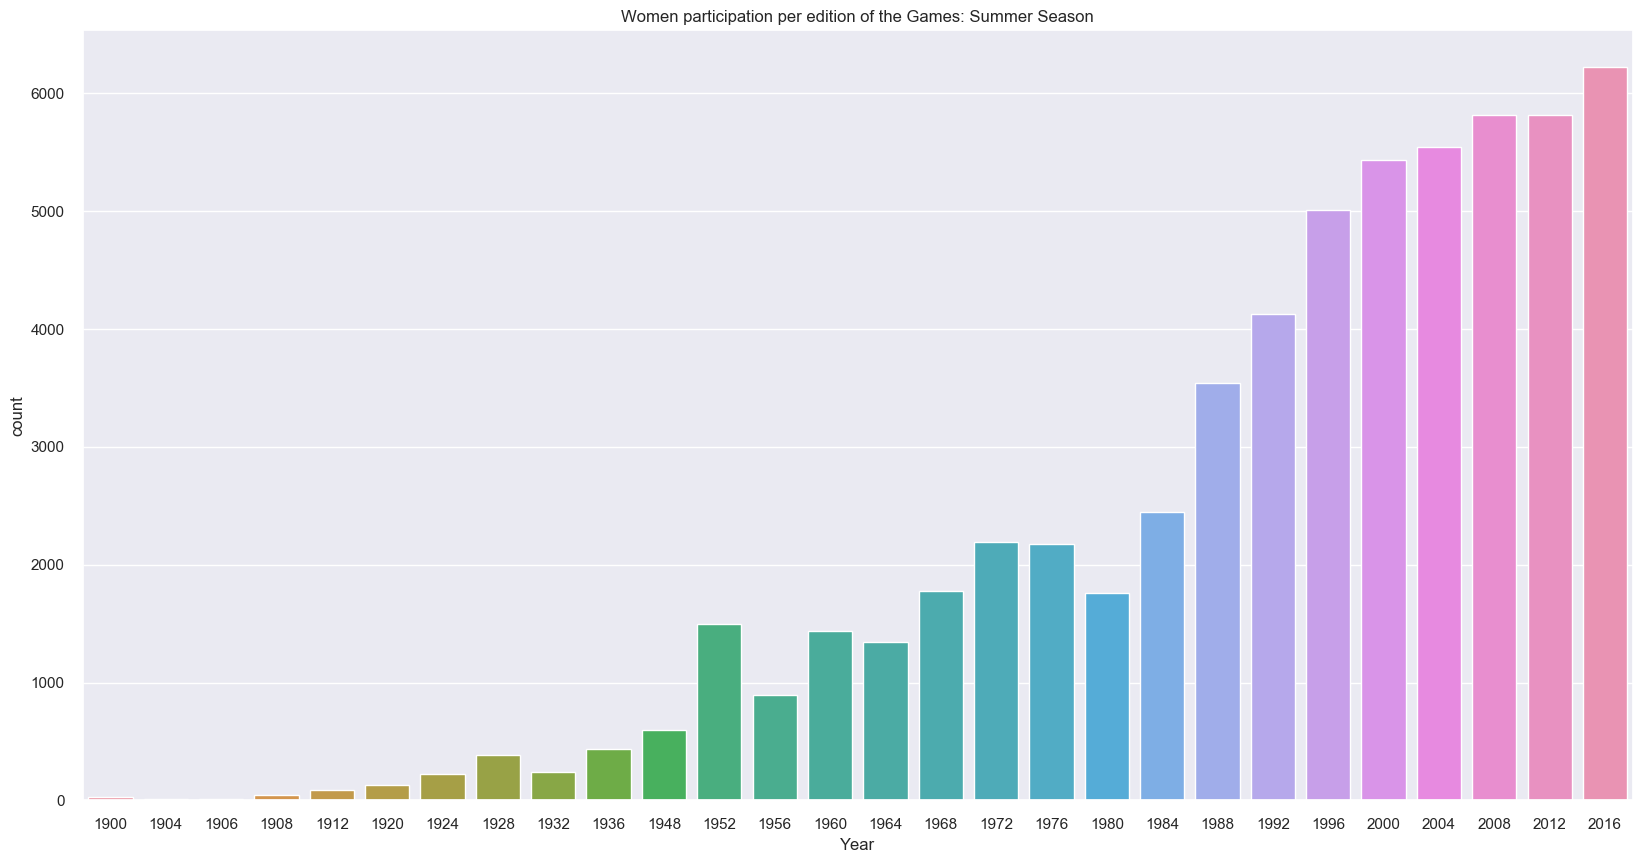

In [43]:
womenInOlympics = gender_f[(gender_f.Season == 'Summer')]
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=womenInOlympics)
plt.title('Women participation per edition of the Games: Summer Season');

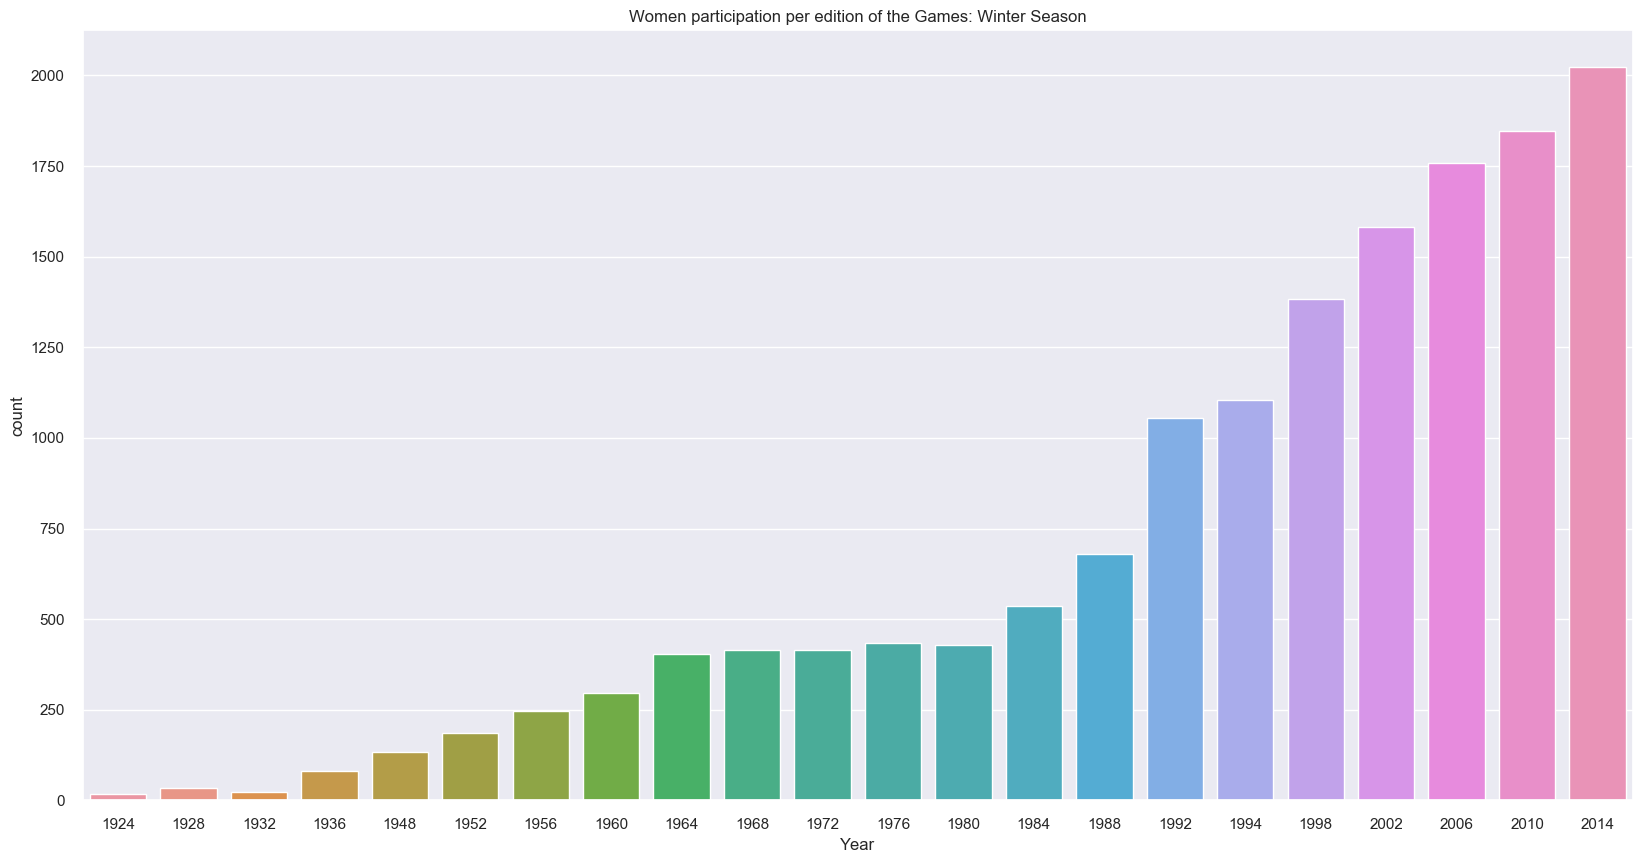

In [44]:
womenInOlympicsWinter = gender_f[(gender_f.Season == 'Winter')]
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=womenInOlympicsWinter)
plt.title('Women participation per edition of the Games: Winter Season');

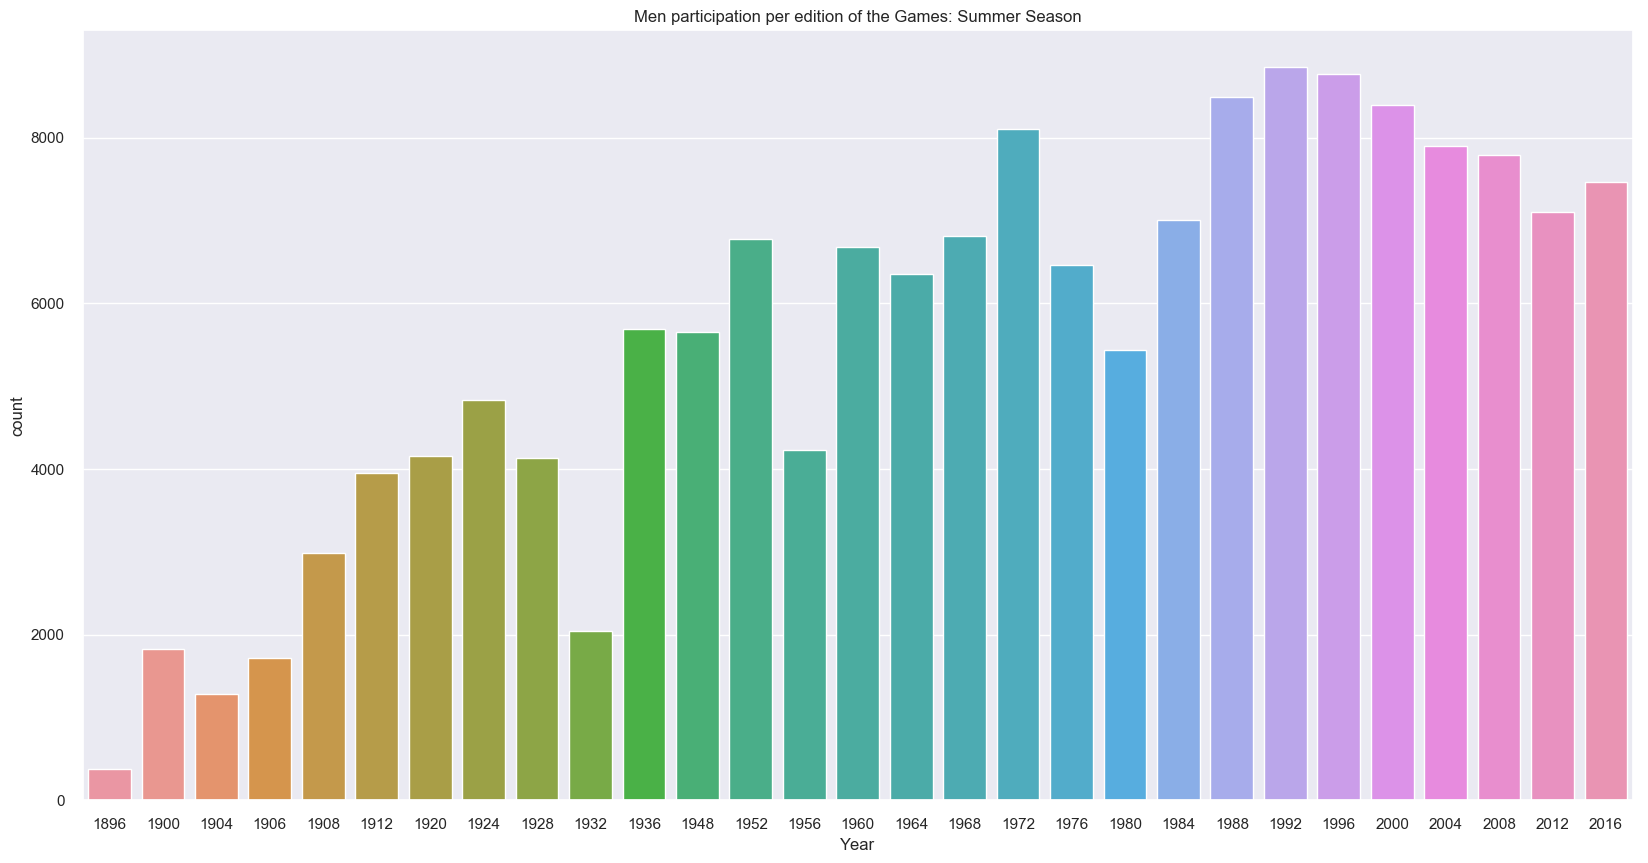

In [45]:
menInOlympics = gender_m[(gender_m.Season == 'Summer')]
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=menInOlympics)
plt.title('Men participation per edition of the Games: Summer Season');

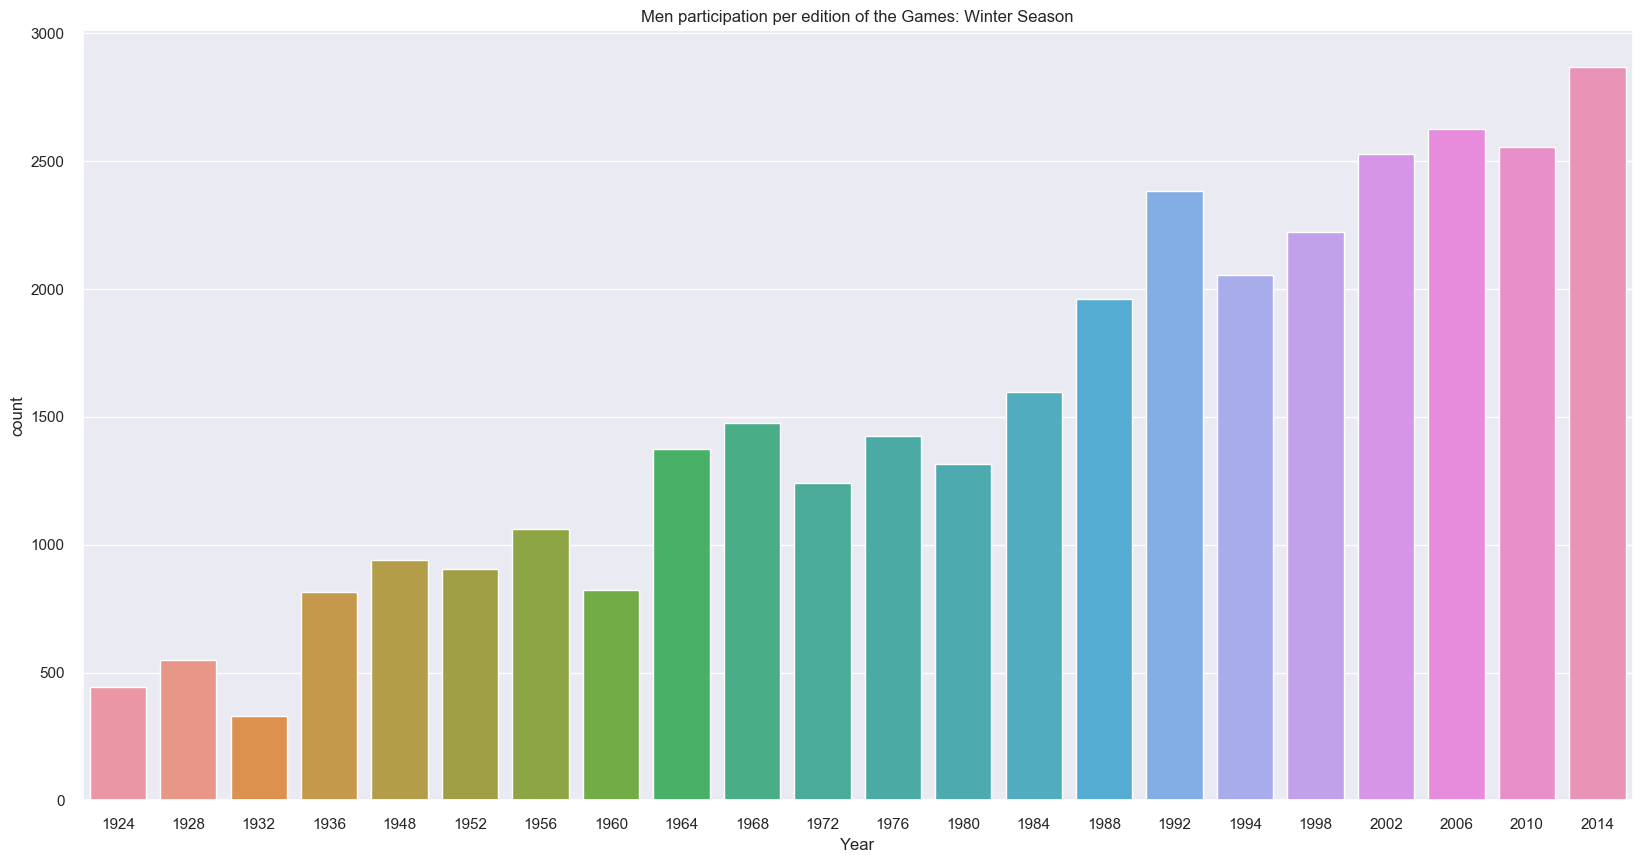

In [46]:
menInOlympicsWinter = gender_m[(gender_m.Season == 'Winter')]
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=menInOlympicsWinter)
plt.title('Men participation per edition of the Games: Winter Season');

## Analysis: 

From the Gender Distribution of the Athletes graph, we can confirm Men as the prevailing Gender with the highest participation rates whit almost 200k Athletes in contrast to Women with 75k Athletes over the 120 years of the Olympic Games. Furthermore, the Distribution of Age pictures Women from 18 to 26 years old as the leading the age group in comparison to Men where 24 years old is significantly the spike age group with over 250k athletes. Moreover, summer seems to be the favourite season for the athletes to compete, that is reasonable due to the fact that more Sports are part of the list for that particular season, in relation to Winter season. Being over 6k to 8k athletes per gender competing in Summer Games, on the contrary only between 2k to 2.5k athletes per gender competing in Winter Games. 


#### Question 2

**2.** How is the Relationship/Distribution between Height and Weight for Female and Male Athletes? 

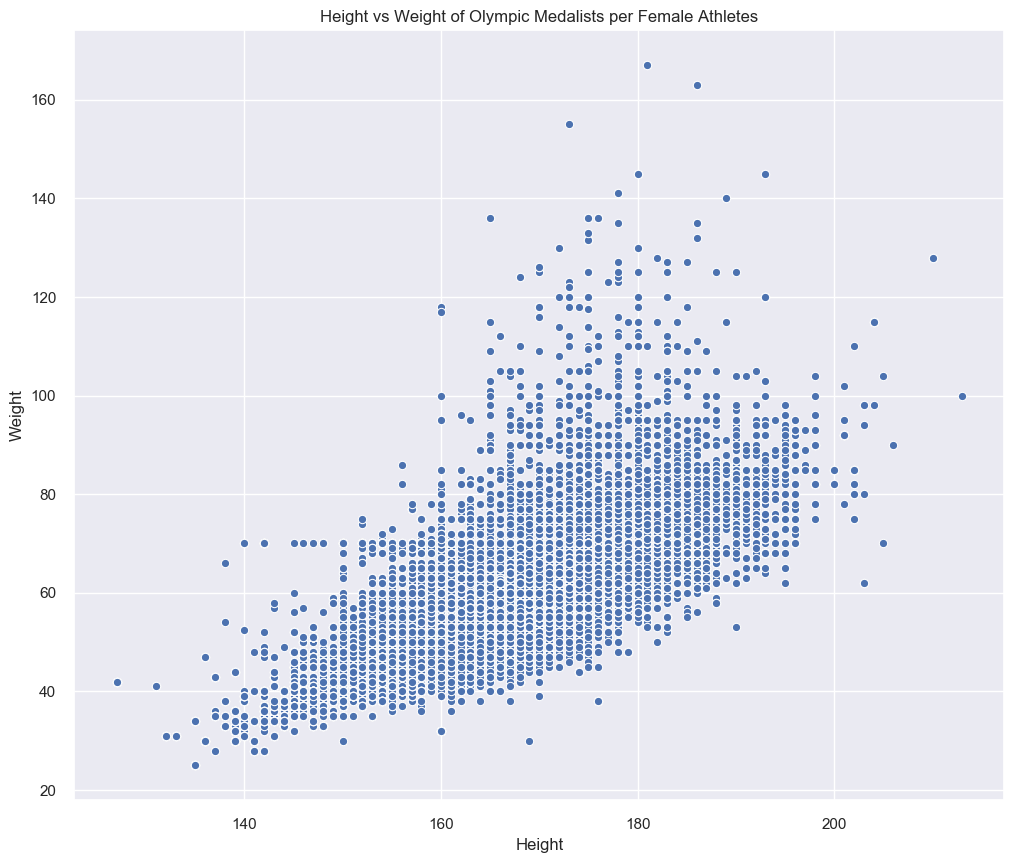

In [47]:
plt.figure(figsize=(12, 10))
ax = sns.scatterplot(x="Height", y="Weight", data=gender_f)
plt.title('Height vs Weight of Olympic Medalists per Female Athletes');

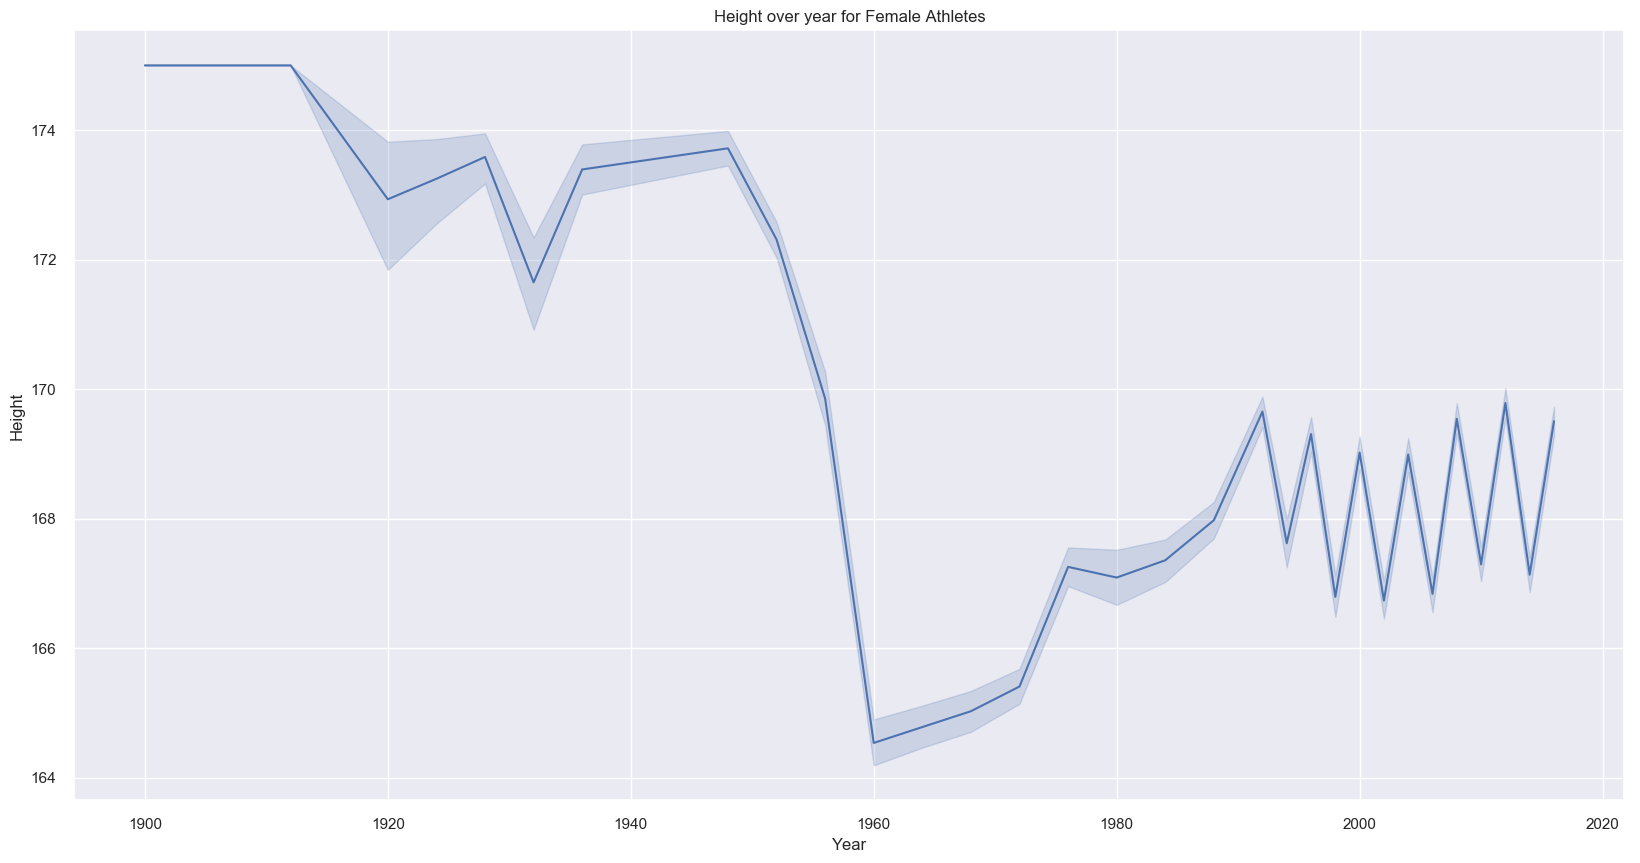

In [48]:
plt.figure(figsize=(20, 10))
sns.lineplot('Year', 'Height', data=gender_f)
plt.title('Height over year for Female Athletes');

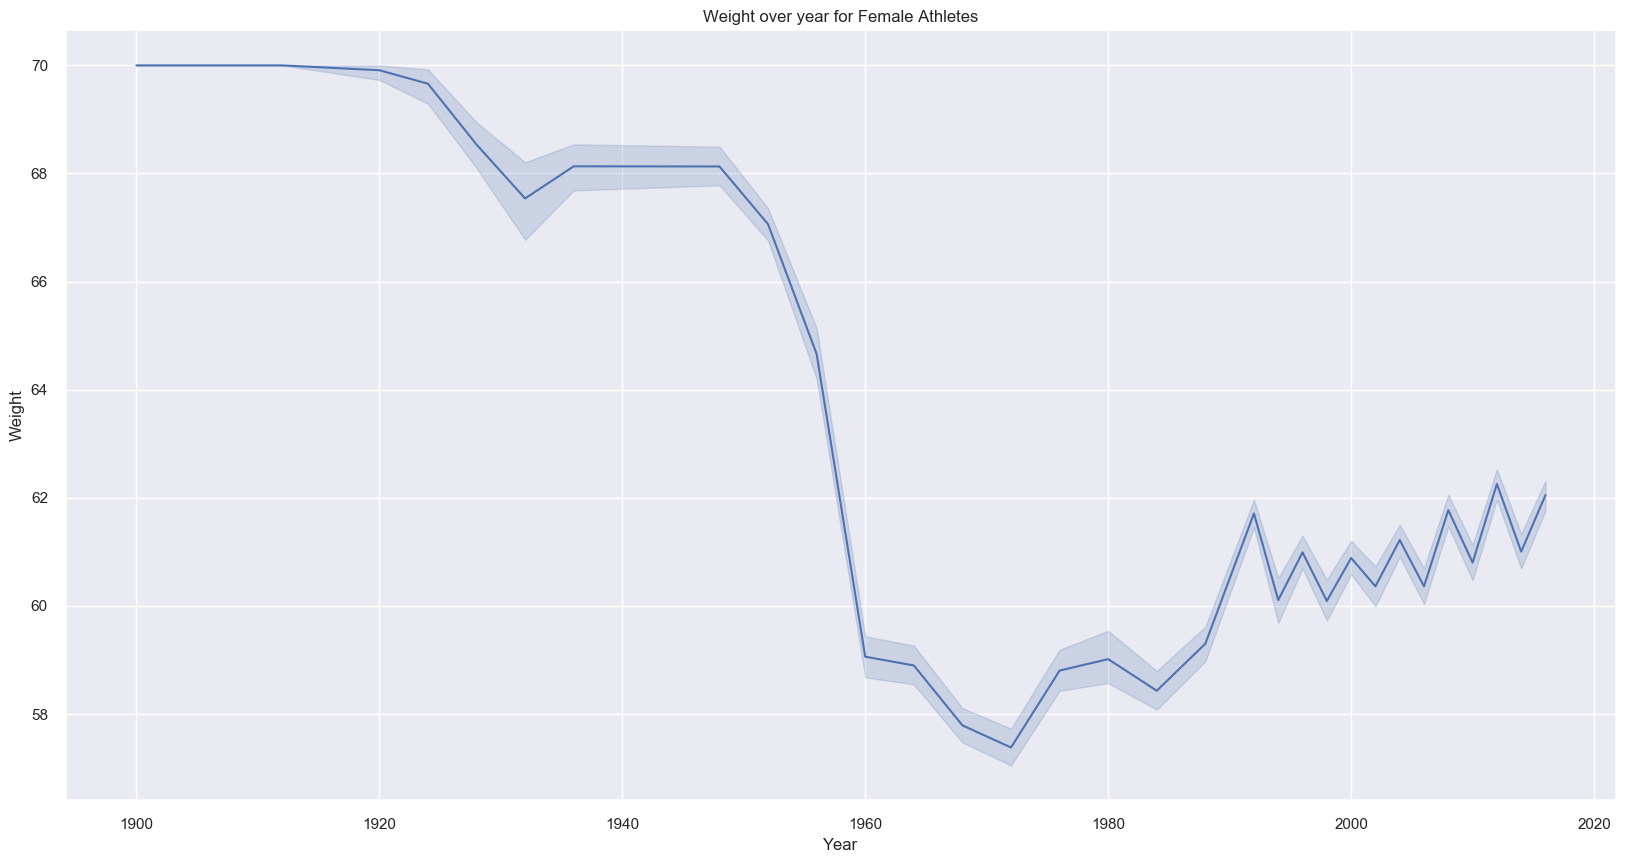

In [49]:
plt.figure(figsize=(20, 10))
sns.lineplot('Year', 'Weight', data=gender_f)
plt.title('Weight over year for Female Athletes');

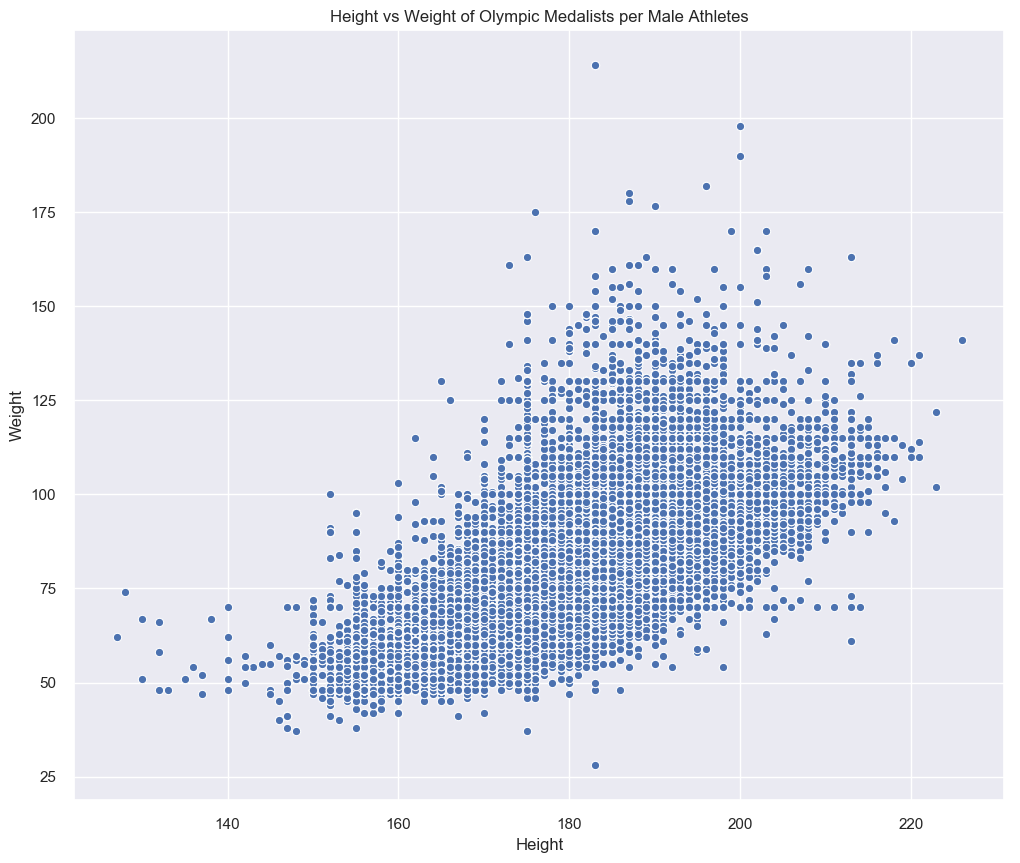

In [50]:
plt.figure(figsize=(12, 10))
ax = sns.scatterplot(x="Height", y="Weight", data=gender_m)
plt.title('Height vs Weight of Olympic Medalists per Male Athletes');

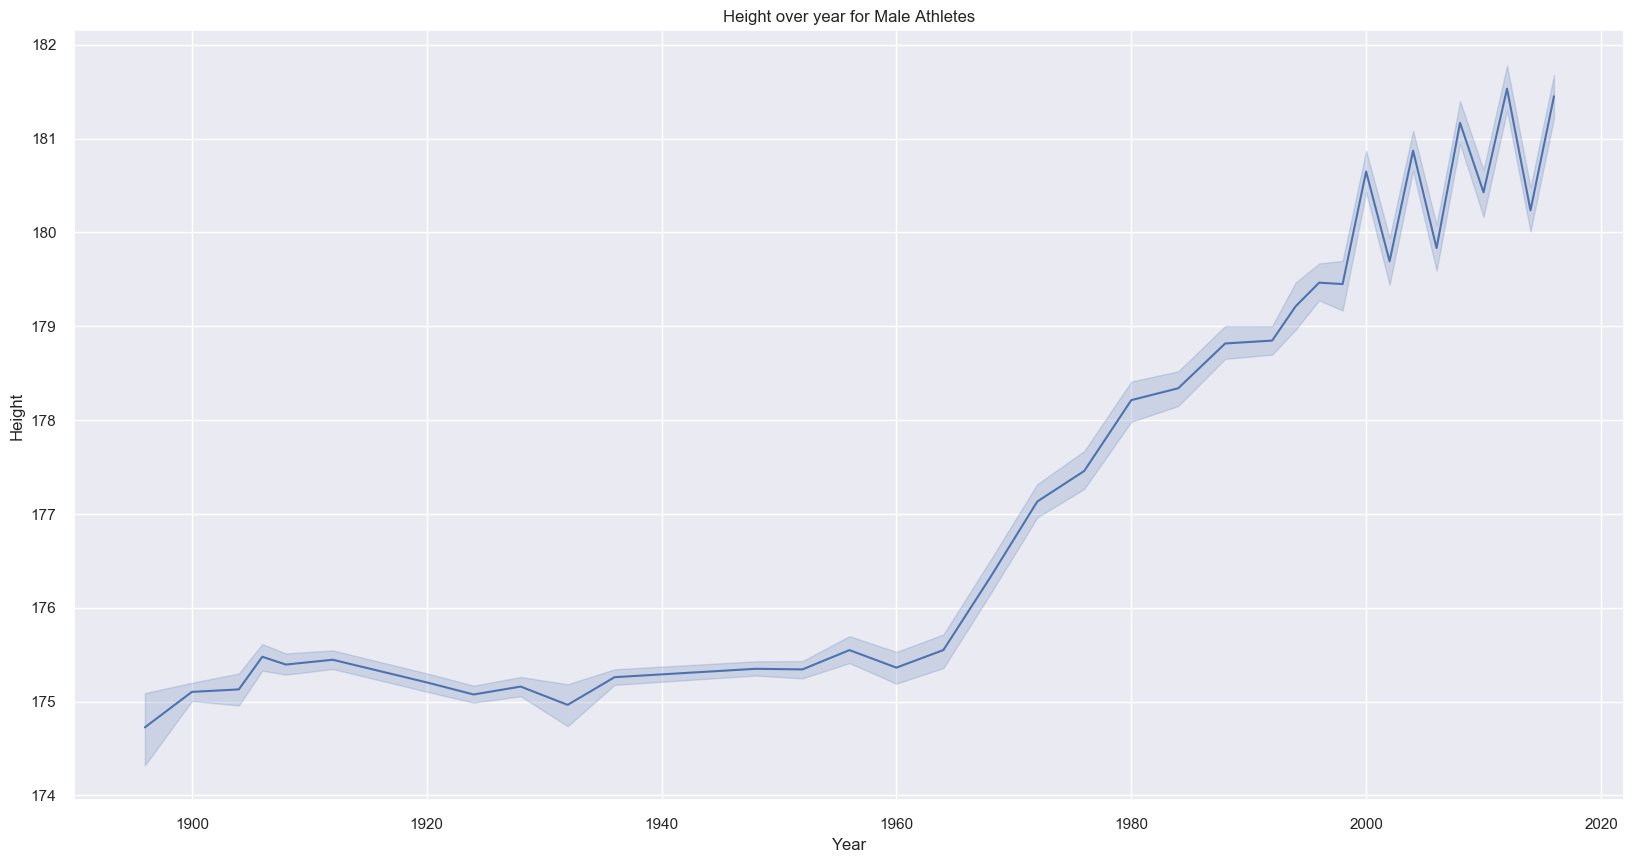

In [51]:
plt.figure(figsize=(20, 10))
sns.lineplot('Year', 'Height', data=gender_m)
plt.title('Height over year for Male Athletes');

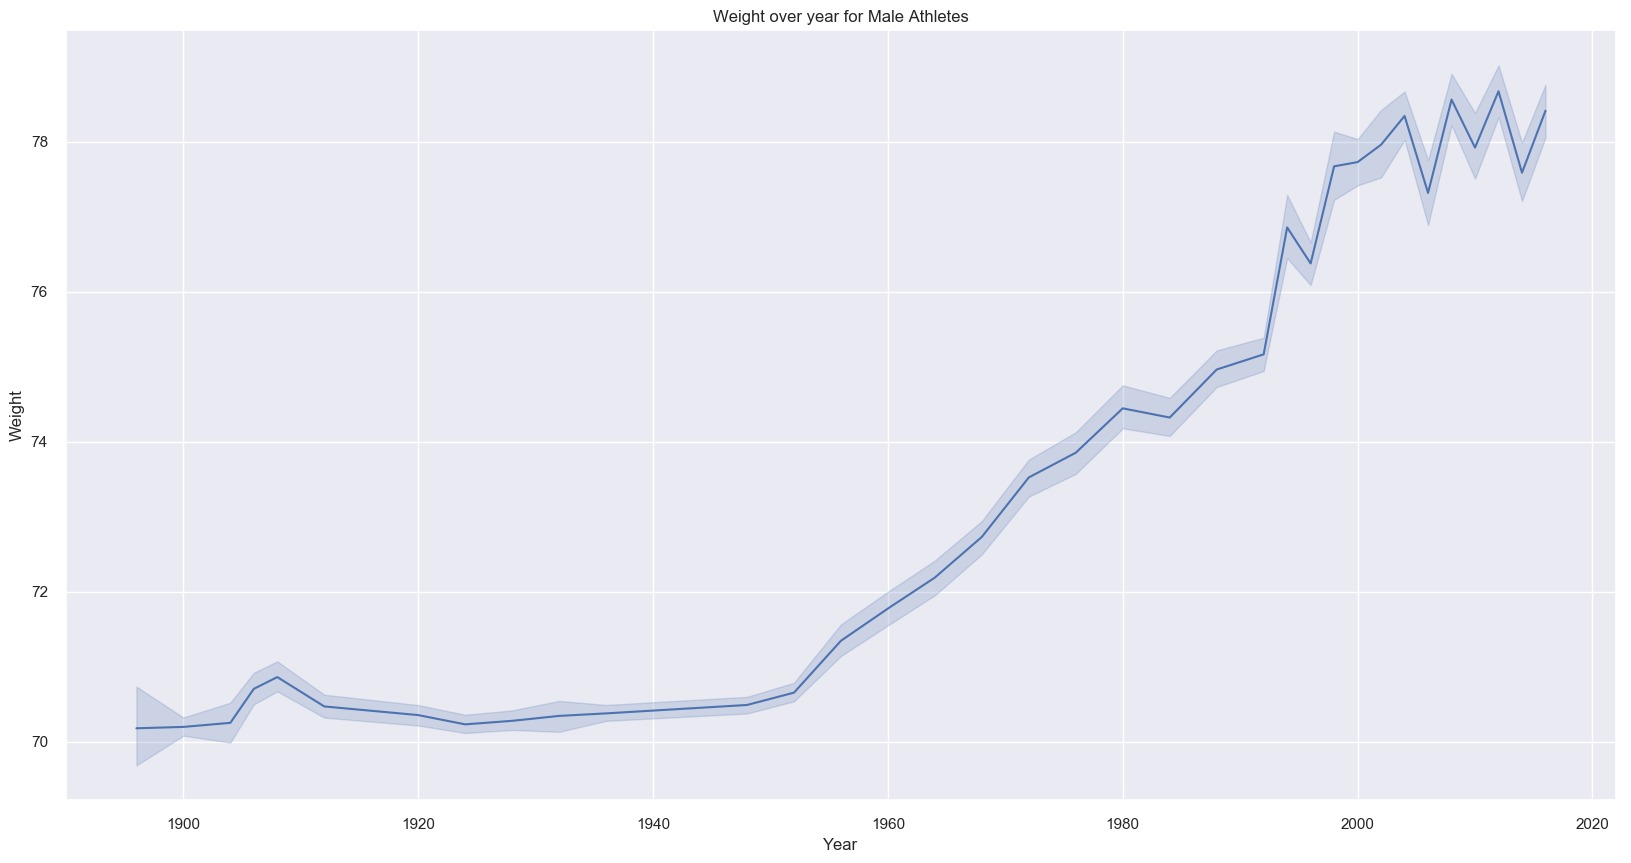

In [52]:
plt.figure(figsize=(20, 10))
sns.lineplot('Year', 'Weight', data=gender_m)
plt.title('Weight over year for Male Athletes');

## Analysis:

Having in mind that wheight has being measure in centimeters and weight in kilograms, the distribution in male athletes have the bigest concentration of athletes between 175 cm and 200 cm vs 80kg to 90kg in the other hand for female athletes goes from 160cm to 170cm heigt vs weight 75kg. That is consistent with the rule of your weight should your height less 100 cm, so for male athletes with 175 cm height they should weight ~75kg. But as I mentioned, It is just a 'Rule', but it is consistent with the fact that Athletics is the sport with most participants, so athletes need to be in the right weight to be part of these sports. 

Next, we visualize a consistent trend of having smaller and smaller female athletes over the years, going from 174cm to 164 cm (ten full centimeters) to spike up again and stabilize in almost 170cm in height and for weight from 70kg plummenting to less than 57kg to recover in 62 kg. For the male athleste quite the oppposite happenned, where the target was to have taller athletes, that consistently increased to reached 182cm in height and for weight went from 70kg to 78 kg over the years of the olympics games.

Good enough for the athletes, it has being a change that we can quantify across 120 years of The Games, and it hasn't being a drastic change, from overnight

#### Question 3

**3.**  How many athletes had participated in the Games? Top 10 Countries with the highest number of Athletes competing?

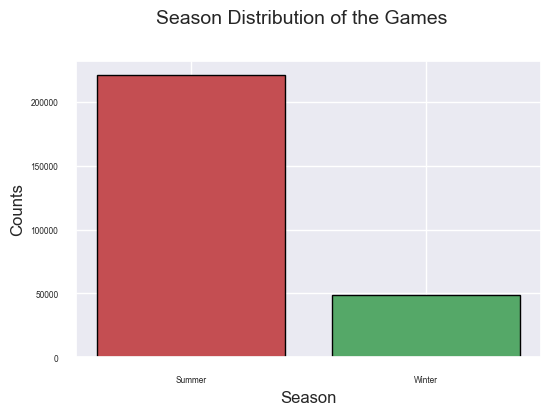

In [53]:
# Bar Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Season Distribution of the Games", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
my_colors = 'rgb'  #red, green, blue.

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Season")
ax.set_ylabel("Counts") 
season = olympics['Season'].value_counts()
season = (list(season.index), list(season.values))
ax.tick_params(axis='both', which='major', labelsize=6)
bar = ax.bar(season[0], season[1], edgecolor='black', color=my_colors, linewidth=1)

In [54]:
olympics['Season'].value_counts()

Summer    220555
Winter     48564
Name: Season, dtype: int64

In [55]:
totalNOC = olympics.NOC.value_counts().reset_index(name='NOC').head(10)
totalNOC 

,index,NOC
0,USA,18514
1,FRA,12440
2,GBR,12047
3,ITA,10643
4,CAN,9675
5,GER,9675
6,JPN,8405
7,SWE,8266
8,AUS,7636
9,HUN,6545


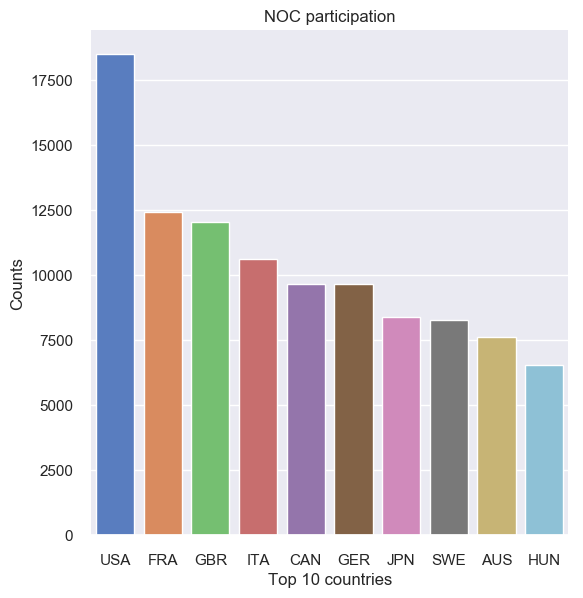

In [56]:
g = sns.catplot(x="index", y="NOC", data=totalNOC,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 10 countries")
g.set_ylabels("Counts")
plt.title('NOC participation');

In [57]:
totalSports = olympics.Sport.value_counts().reset_index(name='Sport').head(10)
totalSports

,index,Sport
0,Athletics,38624
1,Gymnastics,26707
2,Swimming,23195
3,Shooting,11448
4,Cycling,10795
5,Fencing,10735
6,Rowing,10595
7,Cross Country Skiing,9133
8,Alpine Skiing,8829
9,Wrestling,7154


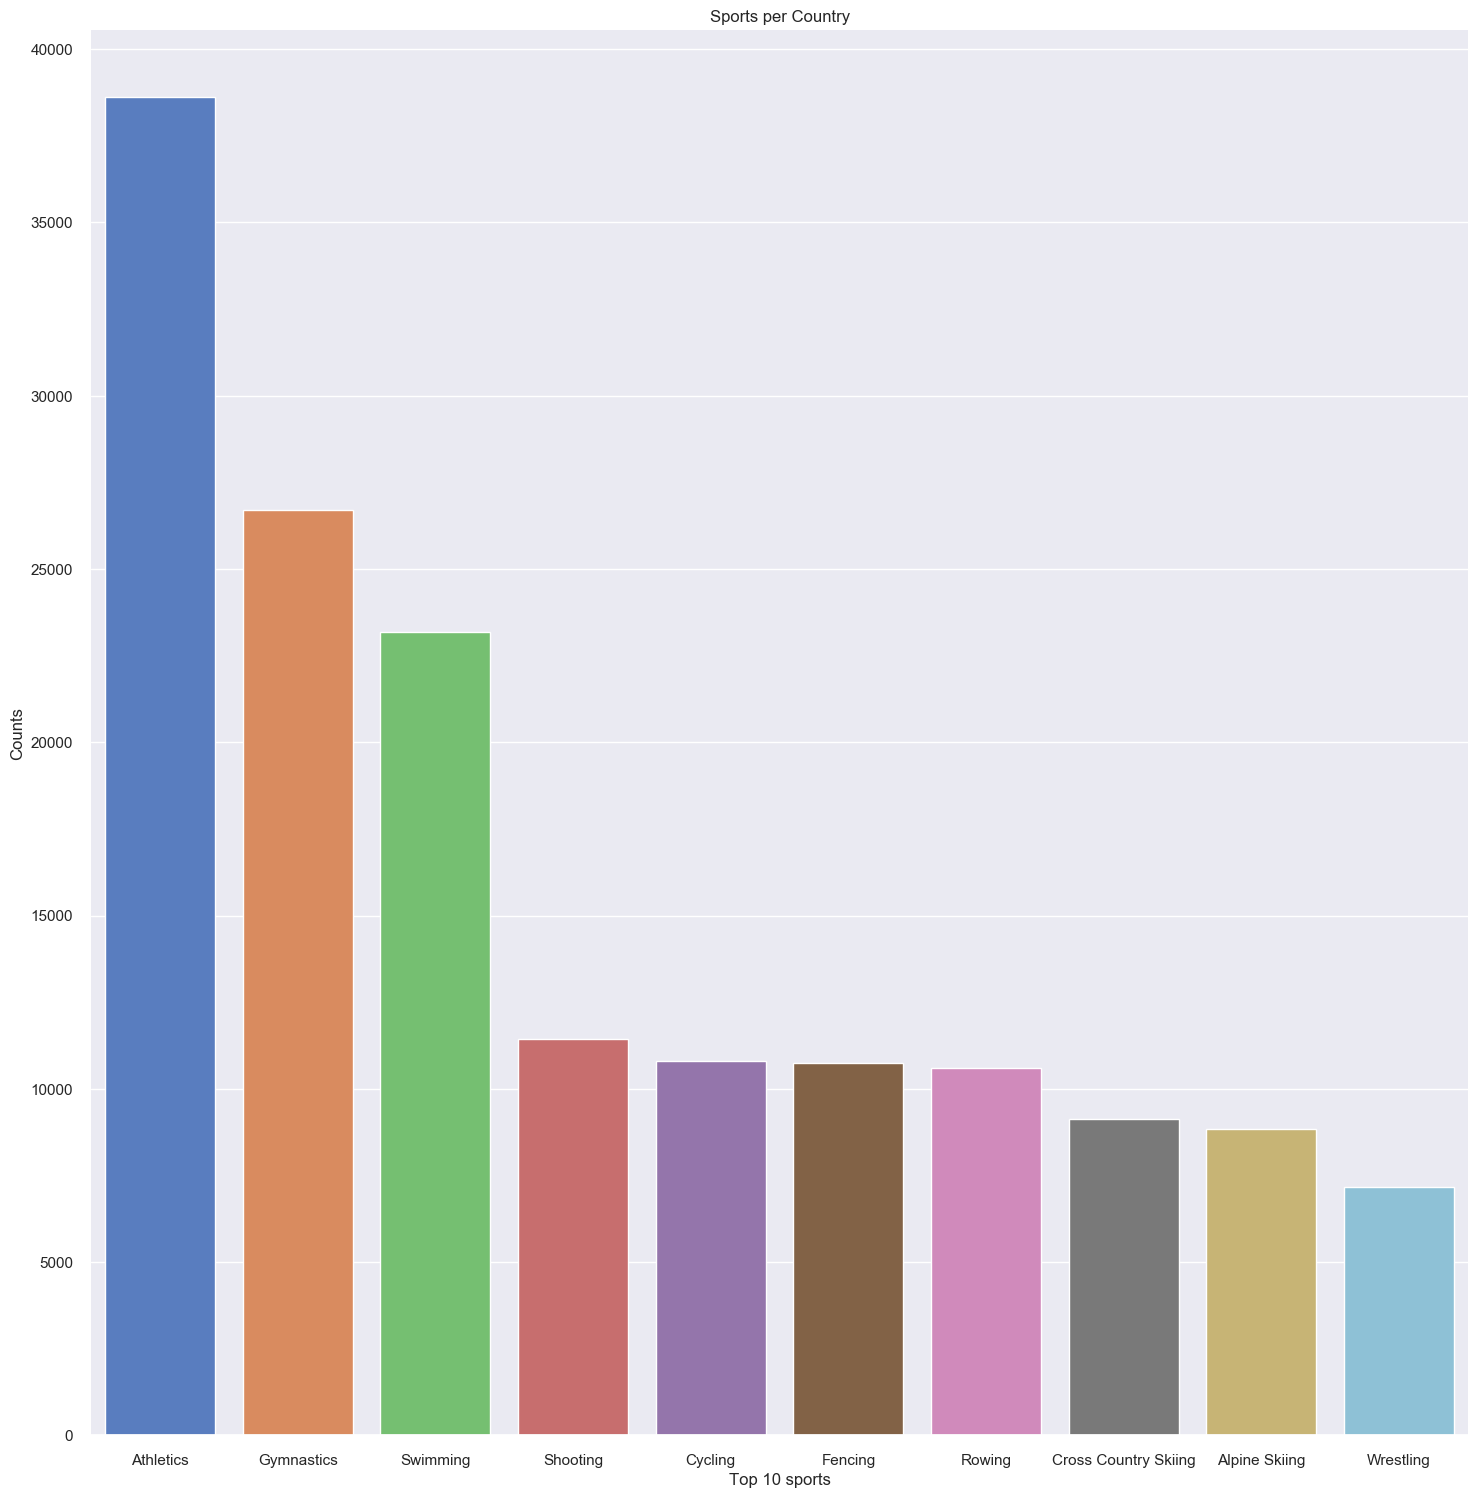

In [58]:
s = sns.catplot(x="index", y="Sport", data=totalSports,
                height=15, kind="bar", palette="muted")
s.despine(left=True)
s.set_xlabels("Top 10 sports")
s.set_ylabels("Counts")
plt.title('Sports per Country');

## Analysis:

As mentioned before, when counting the number of female and male athletes that are being taken part of the olympic games over the years and noticing that they were more engaged on the Summer Games seems to be the most popular option when competing reached 225k participants in 120 years of history, in comparison to Winter Games that only get close to 50k athletes.

Furthermore, evaluating closely the characteristics of the games, countries such as USA, France, Great Britain, Italy, Canada, Germany, Japan, Sweden, Australia and Hungary, where in the top ten countries with the highest number of participants, going from over 175k to 6k athletes. Subsequently, sports like Athletics, Gymnastics, Swimming, Shooting, Cycling, Fencing, Rowing, Cross Country Skiing, Alpine Skiing, Wrestling where the top 10 sports play by the athetles with the highest numbers of participants, that goes from 400k to 7k athletes.

#### Question 4:
- How is the Gold Medal winner distribution? per country? per Sport? and Age?

In [59]:
medalists = olympics[olympics['Medal'] == 'Gold']
medalists.head()

,ID,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal
3,4,M,34.0,175.0,70.0,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
42,17,M,28.0,175.0,64.0,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,M,28.0,175.0,64.0,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,M,28.0,175.0,64.0,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
60,20,M,20.0,176.0,85.0,NOR,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold


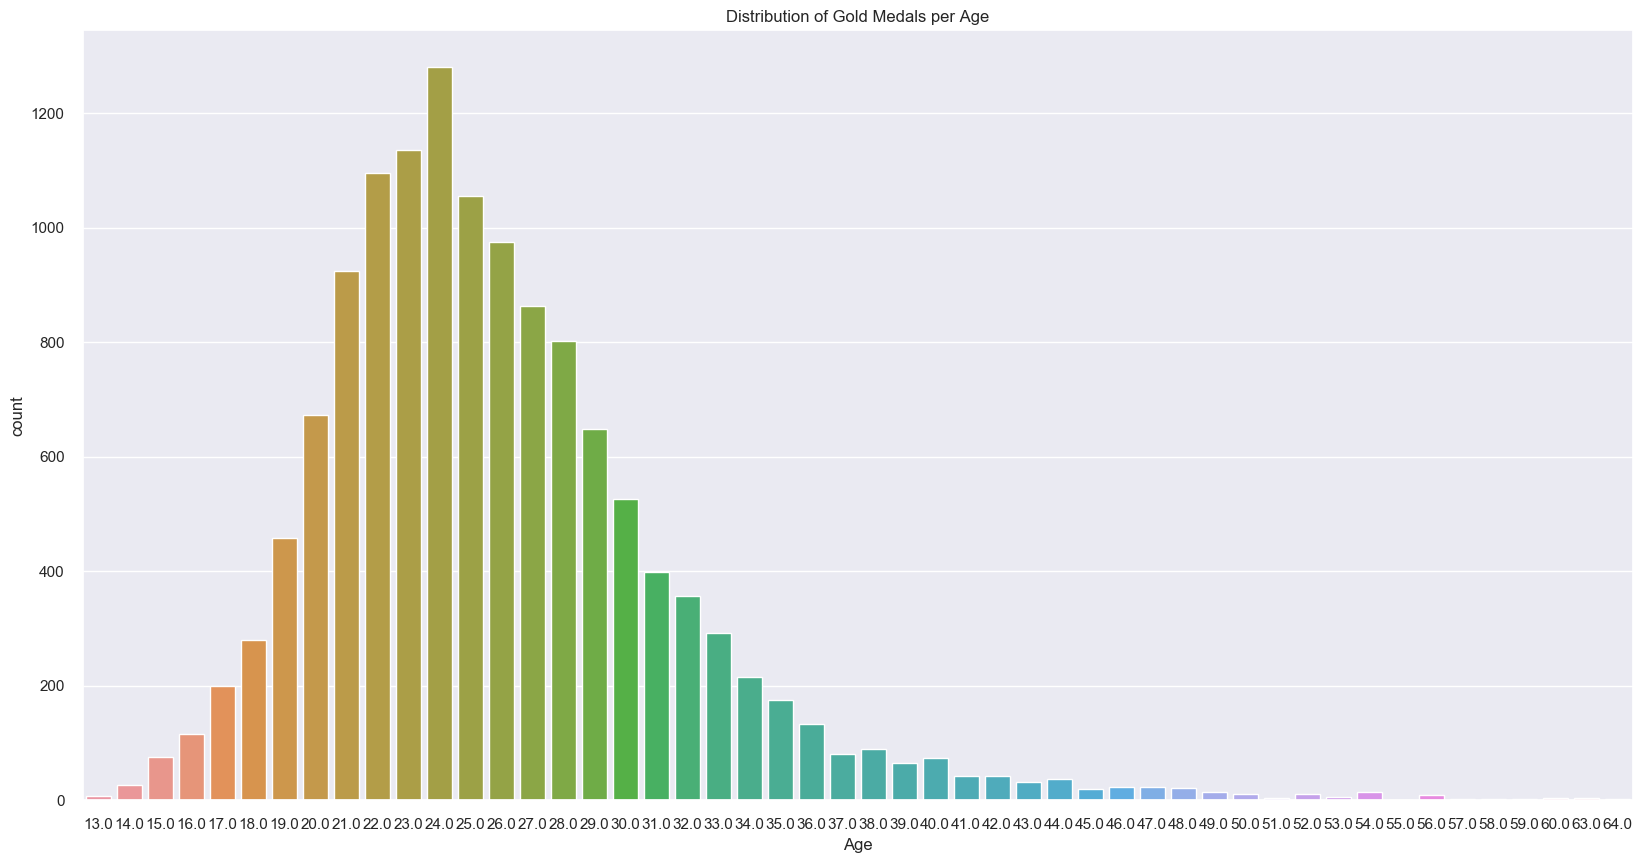

In [60]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(medalists['Age'])
plt.title('Distribution of Gold Medals per Age');

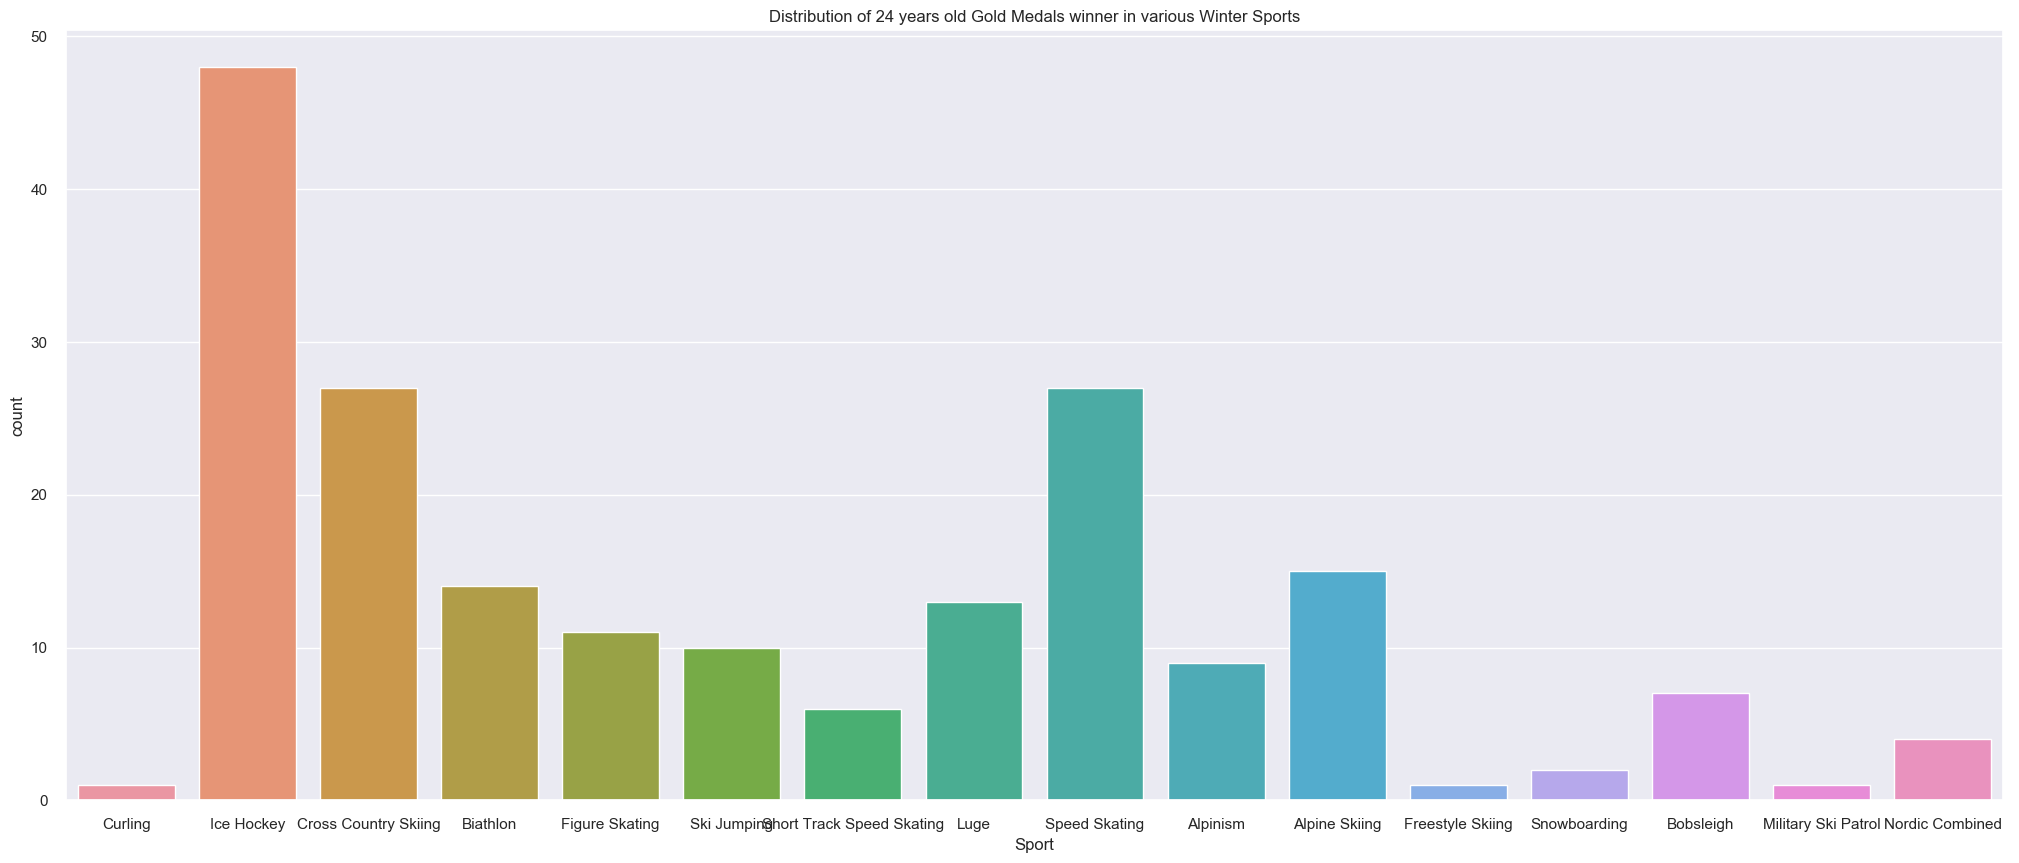

In [61]:
winterSports = medalists['Sport'][medalists['Season'] == 'Winter'][medalists['Age'] == 24]
plt.figure(figsize=(25, 10))
plt.tight_layout()
sns.countplot(winterSports)
plt.title('Distribution of 24 years old Gold Medals winner in various Winter Sports');

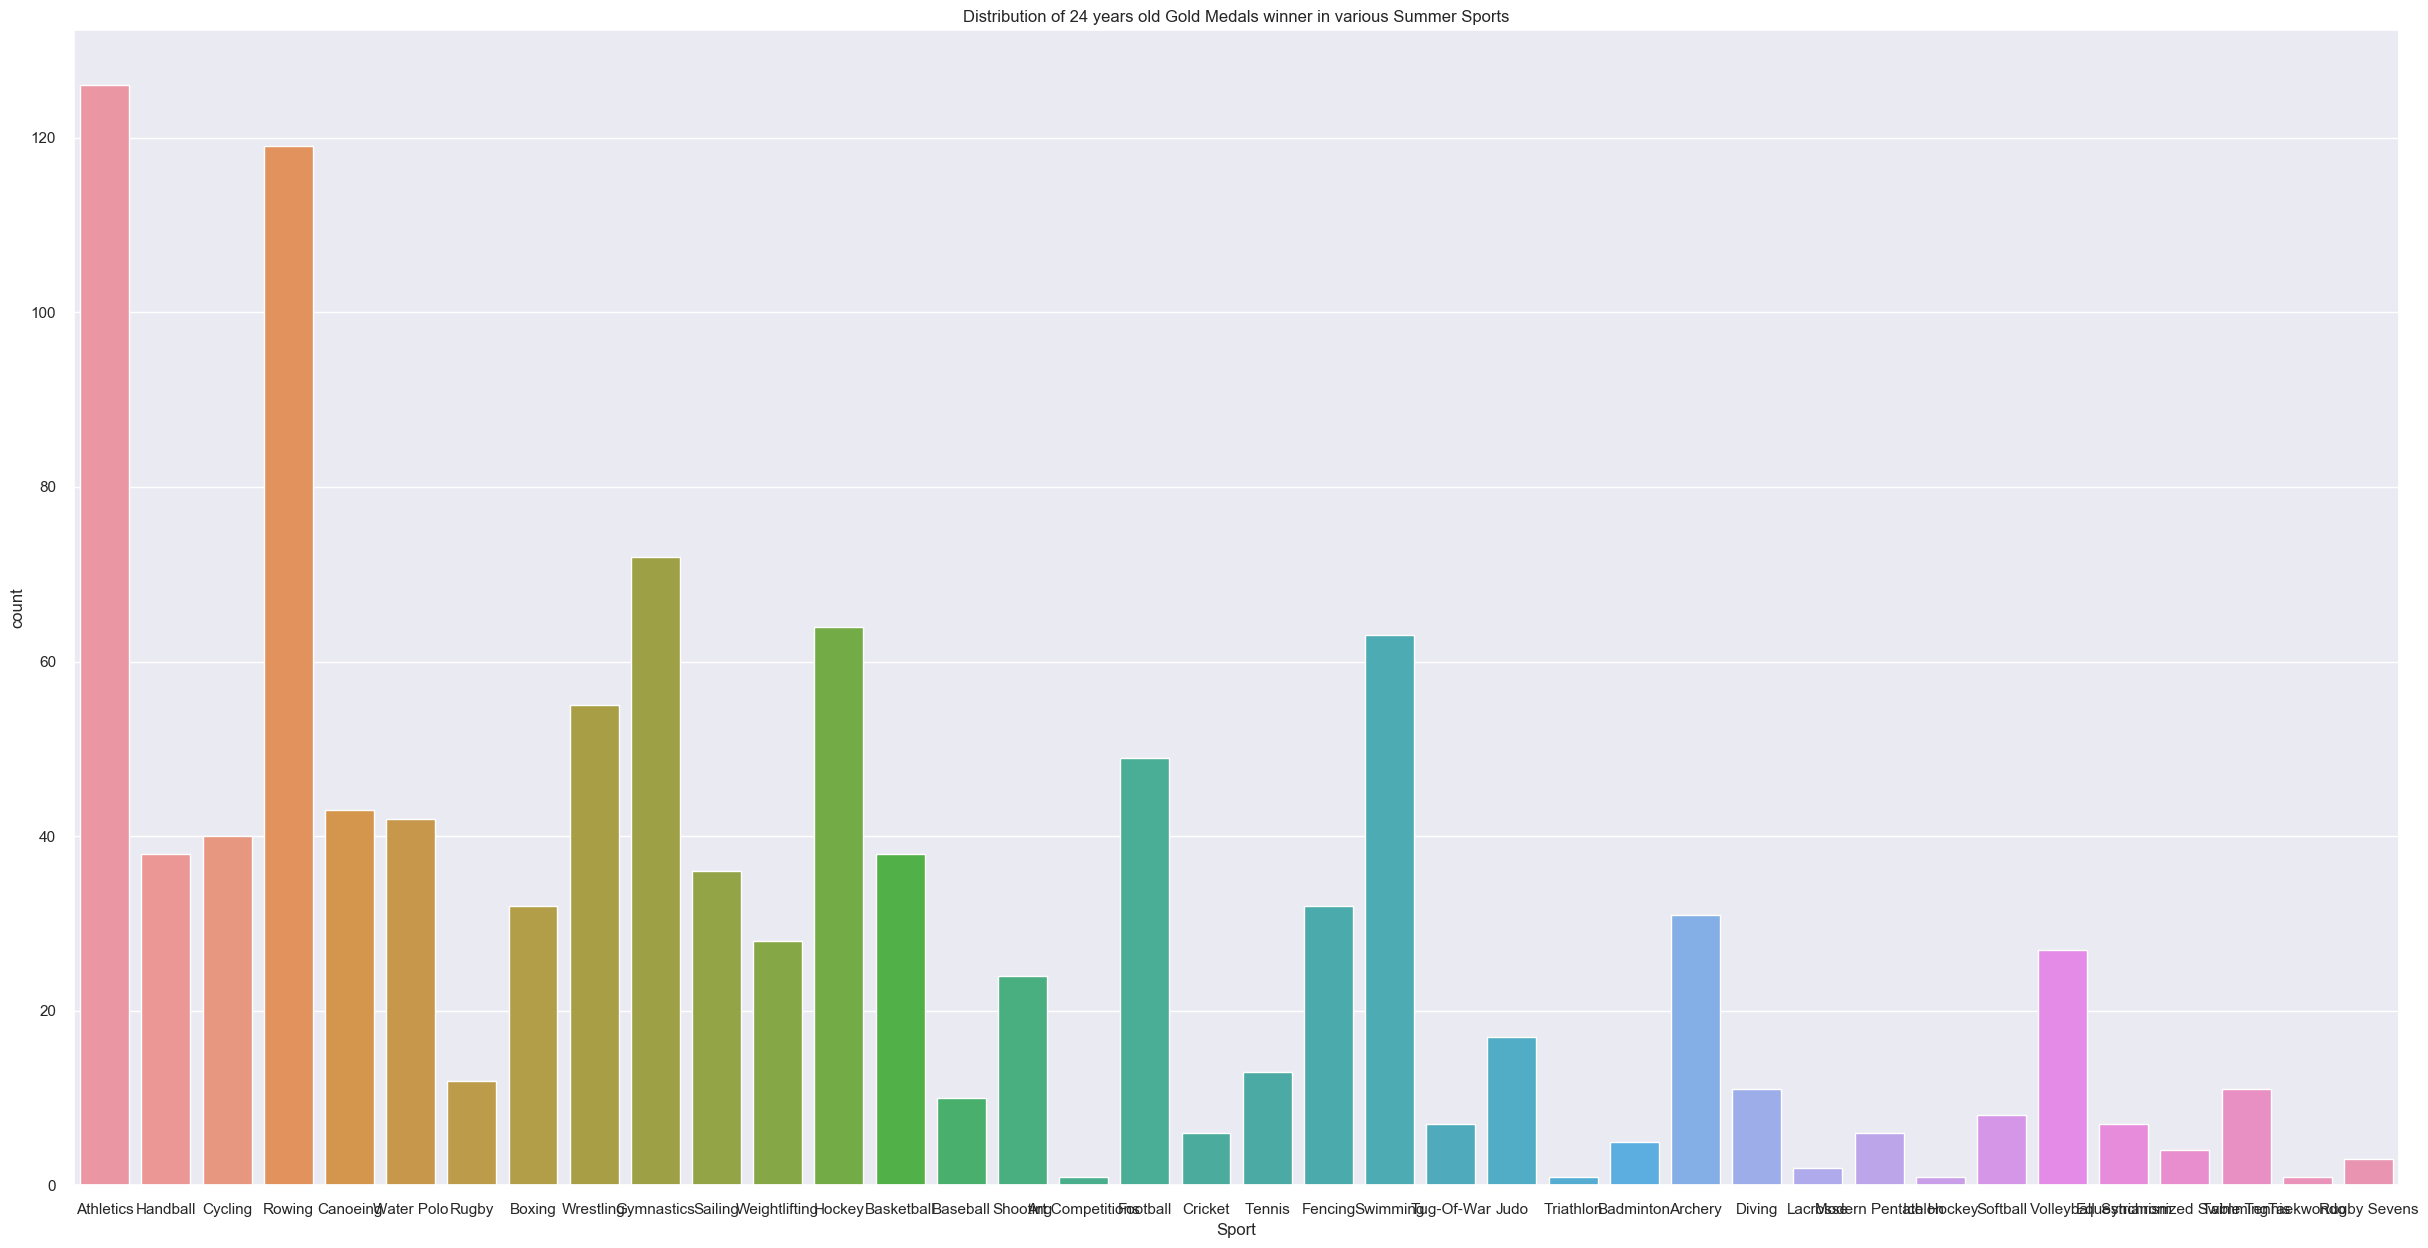

In [62]:
summerSports = medalists['Sport'][medalists['Season'] == 'Summer'][medalists['Age'] == 24]
plt.figure(figsize=(30, 15))
plt.tight_layout()
sns.countplot(summerSports)
plt.title('Distribution of 24 years old Gold Medals winner in various Summer Sports');

In [63]:
medalistNOC = medalists.NOC.value_counts().reset_index(name='NOC').head(10)
medalistNOC

,index,NOC
0,USA,2638
1,URS,1082
2,GER,745
3,GBR,676
4,ITA,575
5,FRA,497
6,SWE,479
7,CAN,463
8,HUN,432
9,GDR,397


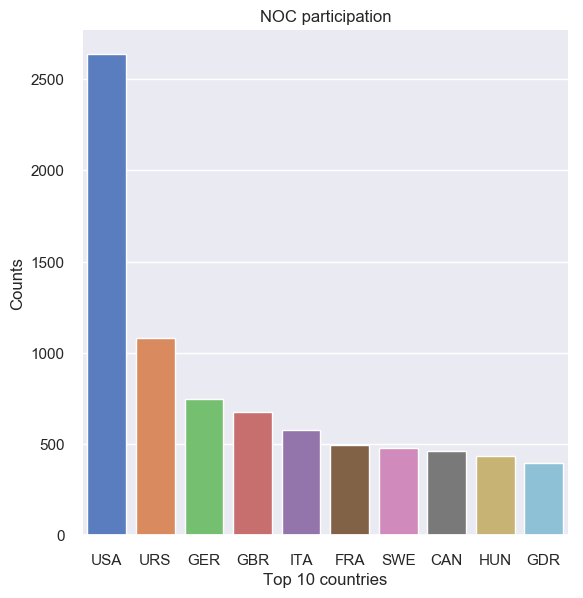

In [64]:
mn = sns.catplot(x="index", y="NOC", data=medalistNOC,
                height=6, kind="bar", palette="muted")
mn.despine(left=True)
mn.set_xlabels("Top 10 countries")
mn.set_ylabels("Counts")
plt.title('NOC participation');

## Analysis:

At the beginning, when determing the number of missing values per column, it is well know that when a column have over 50% of missing values, probably won't provide enough information or tell a story. In relation to the Medal's column that have over 84% of missing data, but the decision was to keep it, fill NaNs with 'Not Available' to analize the other part of the information available, that for the case selected, I considered (as the Olympics committe and the entire world) Gold Medals the epitome of excellence in the Games. I decided to define distribution of age, sport and country, and results goes along these lines. 

In age distribution, 24 years old seems to be the age with more athletes winnign a Gold Medal as more than 1200 athletes are part of this VIP list. From the age perspective, it was expected as being 24 years old the age with more participants in the Games. Next, in the sport distribution, I decided to look into the sports that 24 years old Medal winners athletes have more medals, where for Winter Season Ice Hockey is the winner followed by Athetics with Rowling very close to it in the Summer Season of the Games. Finally, the top 10 countries with more Golden Medals are USA, Rusia, Germany, Great Britain, Italy, France, Sweden, Canda and greatly surprise with Hungary as well, with number of medals that goes from over 2500k to 500 medals.

# Data modeling

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

import graphviz 
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [66]:
#Feature Selection
feature_sel = ['Weight', 'Height','Age', 'NOC_enc', 'Medal_enc', 'Sport_enc', 'City_enc']
x=olympic_games[feature_sel]
y=olympic_games.Sex_enc

In [67]:
#Data split
training_features, test_features, \
training_target, test_target = train_test_split(olympic_games.drop(['Sex_enc'], axis=1),
                                               olympic_games['Sex_enc'],
                                               test_size = 0.1,
                                               random_state=12)

In [68]:
tree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
tree_gini.fit(training_features, training_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [69]:
print ('\nTest Results')
print ("Accuracy of Decision Trees is: ", tree_gini.score(test_features, test_target))
print ("Recall of Decision Trees is: ", recall_score(test_target, tree_gini.predict(test_features)))


Test Results
Accuracy of Decision Trees is:  0.836095422116528
Recall of Decision Trees is:  0.6040788579197824


In [70]:
dot_data = tree.export_graphviz(tree_gini, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Athletes and Results")

'Athletes and Results.pdf'